In [1]:
import Euler.Periodic_1D as elr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

## Solving equation

Now that we have successfully implemented both 1D advection and 1D diffusion equations, it is time to move to 2D... but before that, for the sake of completeness, we present here an equation which solves for both these processes simultaneously:

$$ \frac{\partial \phi}{\partial t} + a \frac{\partial \phi}{\partial x} = \kappa \frac{\partial^2 \phi}{\partial x^2}, $$
where $\kappa > 0$, $a$ is the advection speed and $\phi(x,t)$ is the tracer concentration.

For this equation, the analytical solution is given by:
$$ \phi(x,t) =  e^{-\lambda^2 \kappa t} A sin( \lambda (x - at)), $$

where $\lambda = \frac{2 \pi n x}{L_x}$ and $t$ is the elapsed time (in seconds).

Since we have to impose periodic boundary conditions, we take the full sine curve, and assume $A = 1$, and $n = 1$. 

We have a module named Euler, which contains equations for 1D and 2D advection and diffusion for different types of differencing schemes.

In [3]:
#Length of domain
Lx = 100

#Number of points in the domain
nx = 25

#Width of each cell
dx = Lx/nx

g = 9.81
rho0 = 1025

#An array of all points
xu_ocean = np.linspace(0,Lx,nx+1,dtype = float)
xu_ocean = xu_ocean[0:-1]

In [7]:
#Wavelength
lmda = (2*np.pi)/Lx

#Initialising variables
phi_old = (np.sin(lmda*xu_ocean))
phi_old_t0 = (np.sin(lmda*xu_ocean))
phi_new = np.zeros(nx)

#Time parameters
t_start = 0
t_end = 40
dt = 2

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) CD = 0
#By default, switch is set to 0.
switch_diff_scheme = 0    #Switch for diffusion
switch_adv_scheme = -1    #Switch for advection

#Diffusivity and advection speed
#actual_sol = 2*(np.sin(2*np.pi*xu_ocean/(Lx)))
kappa = 4.0
a = 1

#Evolving tracer phi in time
for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*elr.diff_x(kappa,phi_old,dx,nx) - dt*elr.adv_x(a,phi_old,dx,nx,switch_adv_scheme)
    
    BC = np.exp(-lmda**2 * t * kappa) * np.sin(lmda*(xu_ocean-a*t))
    
    phi_old = phi_new

actual_sol = np.exp(-lmda**2 * t * kappa) * np.sin(lmda*(xu_ocean - a*t))

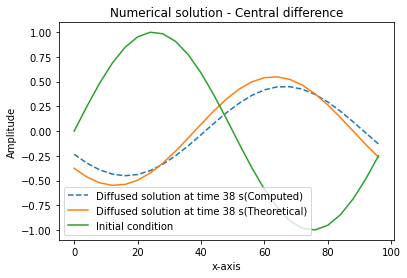

In [8]:
#Plotting

plt.figure()
plt.plot(xu_ocean,phi_new,label = 'Diffused solution at time ' + str(t) + ' s(Computed)',ls = '--')
plt.plot(xu_ocean,actual_sol,label = 'Diffused solution at time ' + str(t) + ' s(Theoretical)')
plt.plot(xu_ocean,phi_old_t0, label = 'Initial condition')
plt.xlabel('x-axis')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Numerical solution - Central difference')
plt.show()

## Error Analysis

In [19]:
#Length of domain
Lx = 10000

#Set of points for which to perform error analysis
nx = [16,32,64,128,256,512,1024,2048,4096,8192,16384]

#Some parameters and constants in the equation
g = 9.81
rho0 = 1025
kappa = 1.0
a = 1
error_diff = np.zeros(len(nx))

#Iterating over all set of points
for i,nxi in enumerate(nx):
    #Spacing between points
    dx = Lx/nxi
    
    #Initialising values for each set of points
    xu_ocean = np.linspace(0,Lx,nxi+1,dtype = float)
    xu_ocean = xu_ocean[0:-1]
    phi_old = (np.sin(lmda*xu_ocean))
    phi_old_t0 = (np.sin(lmda*xu_ocean))
    
    #Time parameters
    t_start = 0
    t_end = 40
    dt = 0.01
    
    for t in np.arange(t_start,t_end,dt):
        phi_new = phi_old + dt*elr.diff_x(kappa,phi_old,dx,nxi,switch_diff_scheme) - dt*elr.adv_x(
            a,phi_old,dx,nxi,switch_adv_scheme)
        phi_old = phi_new
    
    BC = np.exp(-lmda**2 * t * kappa) * np.sin(lmda*(xu_ocean-a*t))
    
    error_iter = max(abs(BC - phi_new))
    error_diff[i] = error_iter

In [15]:
# Some reference variables to check the order of our scheme

#1/h (h is the grid spacing)
nx_inv = np.zeros(len(nx))

#1/h^2 (h is the grid spacing)
nx2_inv = np.zeros(len(nx))

for i,nxi in enumerate(nx):
    nx_inv[i] = 1/nxi
    nx2_inv[i] = 1/nxi**2

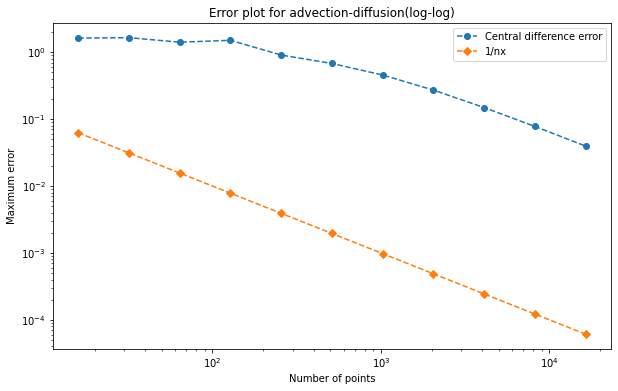

In [18]:
#Plotting

plt.figure(figsize = (10,6))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Maximum error")
plt.plot(nx,error_diff,marker='o',linestyle = '--',label = 'Central difference error')
plt.plot(nx,nx_inv,marker = 'D',linestyle = '--', label = '1/nx')
plt.title("Error plot for advection-diffusion(log-log)")
plt.legend()
plt.show()